In [58]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [59]:
from LoadMultiFiles import LoadOneFileUproot
from copy import copy
filter_leaves = ['xyz_center', 'step_x', 'step_y', 'step_z',  'step_Edep', 'step_Equench', 'step_KineticE']

# v_L_LS = ["1cm", "5cm", "5cm_no_tank"]
v_L_LS = ["1cm", "5cm","10cm"]
template_root_path = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/alpha_{}/root/1000MeV_{}_120.root"

dir_PMT_diff_near_PMT_diff_L_LS = {}
for L_LS in v_L_LS:
    dir_PMT_diff_near_PMT = {}
    for i in range(1, 30, 3):
        dir_PMT_diff_near_PMT[i] = LoadOneFileUproot(template_root_path.format(L_LS,i), name_branch="PMT_log", return_list=False, list_branch_filter=filter_leaves)
    dir_PMT_diff_near_PMT_diff_L_LS[L_LS] = copy(dir_PMT_diff_near_PMT)


In [60]:
from collections import Counter
from FunctionFor_dE_dx import GetNPE
dir_nPE_diff_near_PMT_diff_L_LS = {}

for key, dir_PMT_diff_near_PMT in dir_PMT_diff_near_PMT_diff_L_LS.items():
    dir_nPE_diff_near_PMT = {}
    for d_PMT_near, dir_PMT in dir_PMT_diff_near_PMT.items():
        # v_nPE = GetNPE(dir_PMT)
        # for i_evt in range(len(dir_PMT["evtID"])):
        #     v_nPE.append(Counter(dir_PMT["step_pdgID"][i_evt]==20022)[True])
        dir_nPE_diff_near_PMT[d_PMT_near] = GetNPE(dir_PMT)
        dir_nPE_diff_near_PMT_diff_L_LS[key] = copy(dir_nPE_diff_near_PMT)

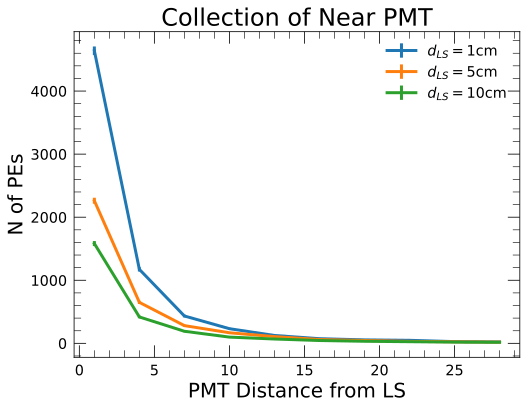

In [61]:
from scipy.optimize import curve_fit
# def func(x, r_PMT, d_LS):
#     return (r_PMT**2/2)*d_LS/(x*(x+d_LS))
def func(x, r_PMT):
    return r_PMT**2/(4*x**2)
n_to_fit = 7
for key, dir_nPE_diff_near_PMT in dir_nPE_diff_near_PMT_diff_L_LS.items():
    v_d_PMT = list(dir_nPE_diff_near_PMT.keys())
    v_nPE = list(dir_nPE_diff_near_PMT.values())
    plt.errorbar( v_d_PMT, v_nPE, yerr=np.sqrt(v_nPE), label="$d_{LS}=$"+key)

    # popt, pcov = curve_fit(func, v_d_PMT[-n_to_fit:], v_nPE[-n_to_fit:], sigma=np.sqrt(v_nPE[-n_to_fit:]),bounds=(0,np.inf))
    # x = np.arange(v_d_PMT[0], v_d_PMT[-1])
    # print(popt)
    # plt.plot(x, func(x, *popt), label="$"+f"{popt[0]:.2f}"+"^2/(4*d_{PMT}^2)$",ls="--")

plt.xlabel("PMT Distance from LS")
plt.ylabel("N of PEs")
plt.title("Collection of Near PMT")
plt.legend()
# plt.semilogy()

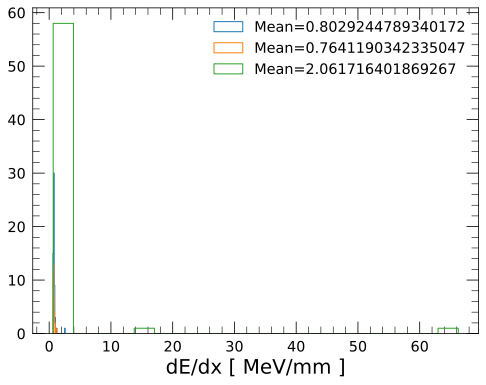

In [62]:
# Check for dE/dx
for L_LS in v_L_LS:
    dir_LS = LoadOneFileUproot(template_root_path.format(L_LS,1), name_branch="GdLS_log", return_list=False)
    dir_geninfo = LoadOneFileUproot(template_root_path.format(L_LS,1), name_branch="genInfo", return_list=False)
    # dir_LS = LoadOneFileUproot(template_root_path.format("1cm",1), name_branch="GdLS_log", return_list=False)
    from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze
    pdgID_certain, dir_analysis = GetDirForNoOpticalAnalyze(dir_LS, dir_geninfo)
    plt.hist(dir_analysis["dE_dx_main_track"],bins=20,histtype="step", label=f"Mean={np.mean(dir_analysis['dE_dx_main_track'])}")
    # print(dir_LS["step_pdgID"])
plt.xlabel("dE/dx [ MeV/mm ]")
plt.legend()

In [63]:
dir_LS = LoadOneFileUproot(template_root_path.format("1cm",34), name_branch="GdLS_log", return_list=False)
print("Total generated PE:\t", len(set(dir_LS["step_trackID"][0][dir_LS["step_pdgID"][0]==20022])))

FileNotFoundError: file not found

    '/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/alpha_1cm/root/1000MeV_34_120.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
# Study why collected PE decrease as L_LS increase
# %matplotlib inline
# evtID = 0
# index_opticalOP = dir_LS["step_pdgID"][evtID]==20022
# v_trackID = dir_LS["step_trackID"][evtID][index_opticalOP]
# set_trackID = set(v_trackID)
#
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for trackID in list(set_trackID)[:100]:
#     if len(dir_LS["step_x"][evtID][index_opticalOP][v_trackID==trackID])>5:
#         n_step = 4
#         ax.plot( dir_LS["step_x"][evtID][index_opticalOP][v_trackID==trackID][:n_step], dir_LS["step_y"][evtID][index_opticalOP][v_trackID==trackID][:n_step],
#                  dir_LS["step_z"][evtID][index_opticalOP][v_trackID==trackID][:n_step],
#                   linewidth=1)
#         print(trackID)

    # else:
    #     plt.scatter( dir_LS["step_x"][evtID][index_opticalOP][v_trackID==trackID], dir_LS["step_y"][evtID][index_opticalOP][v_trackID==trackID],s=1 )